<a href="https://colab.research.google.com/github/tariqzia5/Python_P/blob/main/1_D_Project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-1: Problem Statement  

Task-2: Data Exploration and Validation 

Task-3: Data Cleaning 

Task-4: Model Building Simple Models(Logistic Regregression and 
Decision trees) 

Task-5: Model Validation metrics calculation 

Task-6: Handling Class imbalance(Rebuild Simple ML models)

Task-7: Feature Engineering 

Task-8: Ensemble Methods - XGB and RF 

Task-9: Model presentation 

Task-10: Interview questions on the project




# Download from Github

Create a logionid on github
Upload your file on to github, then use the link here


# Download from Google Drive

#Zip file on GDrive

# Project Objective
## Background 
## Goal, Number of Resources, Business Impact, Time Taken



##**The following dataframe contains the details of credit card clients and the goal of this exploration and creation of data model is to asses the influence of different variables on the probability/chance of a client getting defaulted and how well can we predict those month by month chances of clients defaulting.
** 



# Data Exploration and Validation


In [ ]:
import pandas as pd
import seaborn as sns
cc_default=pd.read_csv("https://raw.githubusercontent.com/Arham-2405/ARHAM/main/UCI_Credit_Card.csv?token=GHSAT0AAAAAAB7DTX742OGZQNAUK7J526Q6Y73PH2A")
cc_default

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
cc_default.shape

(30000, 25)

In [ ]:
cc_default.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [ ]:
cc_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
cc_default.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month'], dtype=object)

In [ ]:
cc_default.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### There are some coded values in the data:
FOR EG:
1) SEX: (1=MALE 2=FEMALE)
2)EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).
3)MARRIAGE:Marital status (1=married, 2=single, 3=others)
4)PAY_0:REPAYMENT STATUS IN SEPTEMBER (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
5)default.payment.next.month:(1=Yes 2=No)


Save it to google drive. Share the link. In the link you will get the file id. 

*   Update "id" with your google drive file ID
*   Update file names if required 



# Data Exploration

# Discrete/Categorical Variables Exploration

## **CAT VAR1=SEX**

In [ ]:
cc_default['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
cc_default['SEX'].isna().sum()

0

In [ ]:
cc_default['SEX'] = cc_default['SEX'].replace([2],0)

 FINDINGS: the first categorical variable that is "SEX" is clean from any errors. And the code for female=2 has been replaced by 0


## **CAT VAR2=EDUCATION**




In [ ]:
cc_default['EDUCATION'].value_counts()


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

 **FINDINGS:There were 14 obs coded as 0 which do not represent anything as per the dataset hence those 14 values will be imputed by the code with the slosest frequency that is 6 while data cleaning.**

## **CAT VAR3=MARRIAGE**


In [ ]:
cc_default['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

 **FINDINGS: There were 54 obs in the dataframe coded 0 which are not true as per the dataset hence those values coded 0 are imputed with the code with the closest frequency that is 3 which rpresents 'OTHERS' category**

## **DISCRETE VAR1=AGE**


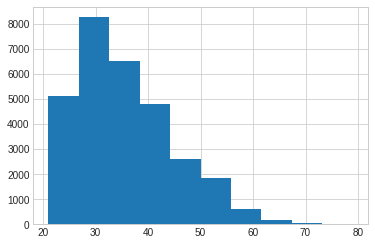

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.hist(cc_default['AGE'],bins=10)
plt.show()

In [ ]:
cc_default['AGE'].isna().sum()

0

 **FINDINGS: The following variable has no suspicious or null values as well as there are not any significant outliers.**

## **DISCRETE VAR2=PAY_0**









In [ ]:
cc_default['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

<AxesSubplot:xlabel='PAY_0', ylabel='count'>

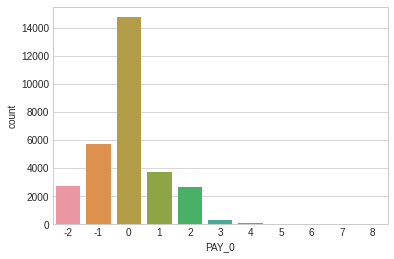

In [ ]:
sns.countplot(x='PAY_0', data=cc_default)

 FINDINGS:
1.The codes -1,-2 will be imputed by 0 in the data cleaning step which represents that the customer has made the payment duly.
2.The column has also been renamed as PAY_1.
3.The rest of the codes will also be grouped in the data cleaning as follows for the ease of analysis.
(1,2,3)=1,(4,5,6)=2,(7,8,9)=3
and the new codes will be:
0=Paid Duly
1=Payment delay for 1-3 months.
2=Payment delay for 4-6 months.
3=Payment delay for-7-9 months and above

## **DISCRETE VARIABLE3=PAY_2**

In [ ]:
cc_default['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

<AxesSubplot:xlabel='PAY_2', ylabel='count'>

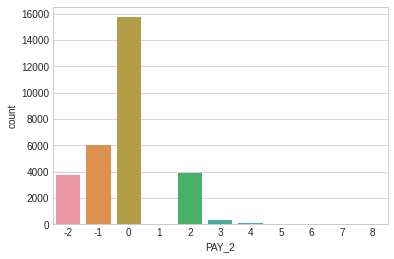

In [ ]:
sns.countplot(x='PAY_2', data=cc_default)

FINDINGS:
1.The codes -1,-2 will be imputed by 0 in the data cleaning step which represents that the customer has made the payment duly.
2.The column has also been renamed as PAY_1.
3.The rest of the codes will also be grouped in the data cleaning as follows for the ease of analysis.
(1,2,3)=1,(4,5,6)=2,(7,8,9)=3
and the new codes will be:
0=Paid Duly
1=Payment delay for 1-3 months.
2=Payment delay for 4-6 months.
3=Payment delay for-7-9 months and above 

## **DISCRETE VARIABLE4=PAY_3**

In [ ]:
cc_default['PAY_3'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

<AxesSubplot:xlabel='PAY_3', ylabel='count'>

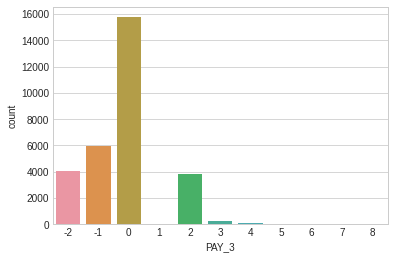

In [ ]:
sns.countplot(x='PAY_3', data=cc_default)

FINDINGS:
1.The codes -1,-2 will be imputed by 0 in the data cleaning step which represents that the customer has made the payment duly.
2.The column has also been renamed as PAY_1.
3.The rest of the codes will also be grouped in the data cleaning as follows for the ease of analysis.
(1,2,3)=1,(4,5,6)=2,(7,8,9)=3
and the new codes will be:
0=Paid Duly
1=Payment delay for 1-3 months.
2=Payment delay for 4-6 months.
3=Payment delay for-7-9 months and above 

## **DISCRETE VARIABLE 5=PAY_4**

In [ ]:
cc_default['PAY_4'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

<AxesSubplot:xlabel='PAY_4', ylabel='count'>

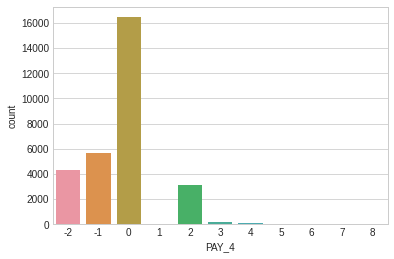

In [ ]:
sns.countplot(x='PAY_4', data=cc_default)

FINDINGS:
1.The codes -1,-2 will be imputed by 0 in the data cleaning step which represents that the customer has made the payment duly.
2.The column has also been renamed as PAY_1.
3.The rest of the codes will also be grouped in the data cleaning as follows for the ease of analysis.
(1,2,3)=1,(4,5,6)=2,(7,8,9)=3
and the new codes will be:
0=Paid Duly
1=Payment delay for 1-3 months.
2=Payment delay for 4-6 months.
3=Payment delay for-7-9 months and above 

## **DISCRETE VARIABLE 6=PAY_5**

In [ ]:
cc_default['PAY_5'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

<AxesSubplot:xlabel='PAY_5', ylabel='count'>

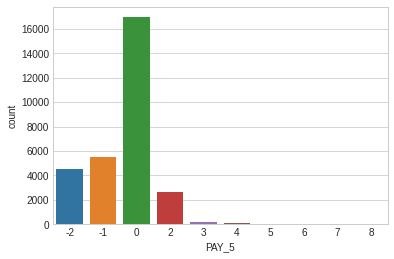

In [ ]:
sns.countplot(x='PAY_5', data=cc_default)

FINDINGS:
1.The codes -1,-2 will be imputed by 0 in the data cleaning step which represents that the customer has made the payment duly.
2.The column has also been renamed as PAY_1.
3.The rest of the codes will also be grouped in the data cleaning as follows for the ease of analysis.
(1,2,3)=1,(4,5,6)=2,(7,8,9)=3
and the new codes will be:
0=Paid Duly
1=Payment delay for 1-3 months.
2=Payment delay for 4-6 months.
3=Payment delay for-7-9 months and above 

## **DISCRETE VARIABLE 7=PAY_6**

In [ ]:
cc_default['PAY_6'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

<AxesSubplot:xlabel='PAY_6', ylabel='count'>

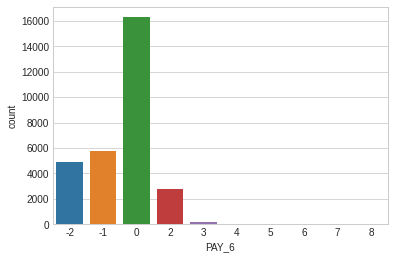

In [ ]:
sns.countplot(x='PAY_6', data=cc_default)

FINDINGS:
1.The codes -1,-2 will be imputed by 0 in the data cleaning step which represents that the customer has made the payment duly.
2.The column has also been renamed as PAY_1.
3.The rest of the codes will also be grouped in the data cleaning as follows for the ease of analysis.
(1,2,3)=1,(4,5,6)=2,(7,8,9)=3
and the new codes will be:
0=Paid Duly
1=Payment delay for 1-3 months.
2=Payment delay for 4-6 months.
3=Payment delay for-7-9 months and above 

## **DISCRETE VARIABLE 8=default.payment.next.month**

In [ ]:
cc_default['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

**FINDINGS: This is the target variable and there are no suspicious,null or unacceptable values in this.**

# Continuous Variables Exploration

## Continuous Var1=LIMIT_BAL

<AxesSubplot:>

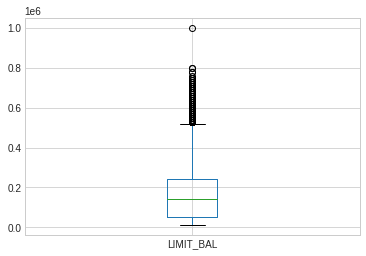

In [ ]:
cc_default.boxplot(column=["LIMIT_BAL"])

In [ ]:
cc_default['LIMIT_BAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.1      30000.0
0.2      50000.0
0.3      70000.0
0.4     100000.0
0.5     140000.0
0.6     180000.0
0.7     210000.0
0.8     270000.0
0.9     360000.0
1.0    1000000.0
Name: LIMIT_BAL, dtype: float64

In [ ]:
cc_default['LIMIT_BAL'].quantile([0.91,0.92,0.93,0.94,0.95,0.06,0.97,0.98,0.99,1])

0.91     360000.0
0.92     380000.0
0.93     390000.0
0.94     410000.0
0.95     430000.0
0.06      20000.0
0.97     500000.0
0.98     500000.0
0.99     500000.0
1.00    1000000.0
Name: LIMIT_BAL, dtype: float64

Findings: In the following variable there are some extreme outliers and hence they will be imputed by the median value of the following variable in the data cleaning process.

## **Continuous Variable2=BILL_AMT1**

<AxesSubplot:>

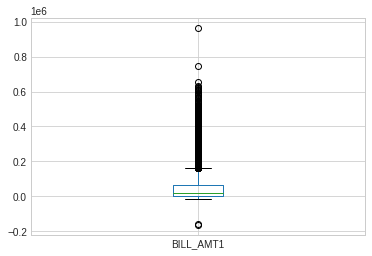

In [ ]:
cc_default.boxplot(column=['BILL_AMT1'])

In [ ]:
cc_default['BILL_AMT1'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.00   -165580.00
0.10       278.90
0.20      1892.80
0.30      6050.40
0.40     13469.20
0.50     22381.50
0.60     37045.20
0.70     52204.90
0.80     83421.20
0.90    142133.70
0.91    151214.72
0.92    162127.84
0.93    173630.63
0.94    187074.56
0.95    201203.05
0.96    220592.72
0.97    245969.84
0.98    282227.68
0.99    350110.68
1.00    964511.00
Name: BILL_AMT1, dtype: float64

In [ ]:
cc_default['BILL_AMT1'].describe()

count     30000.000000
mean      47587.152683
std       62210.647407
min           0.000000
25%        4475.500000
50%       22381.375000
75%       63673.250000
max      350110.000000
Name: BILL_AMT1, dtype: float64

Findings: In this varibale there are negative as well as positive outliers which are not wrong as negative balance indicates advance payment or cashbacks but still for the sake of proper analysis those outliers will be imputed by the median value of the variable in the data cleaning step.

## **Continuous Variable 3=BILL_AMT2**

<AxesSubplot:>

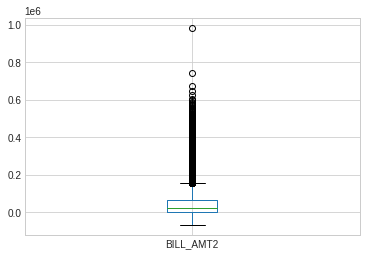

In [ ]:
cc_default.boxplot(column=['BILL_AMT2'])

In [ ]:
cc_default['BILL_AMT2'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    -69777.0
0.1         0.0
0.2      1472.8
0.3      5500.0
0.4     12799.6
0.5     21200.0
0.6     34773.8
0.7     50690.0
0.8     80292.2
0.9    136905.5
1.0    983931.0
Name: BILL_AMT2, dtype: float64

In [ ]:
cc_default['BILL_AMT2'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91    145064.86
0.92    155362.72
0.93    167485.28
0.94    180578.40
0.95    194792.20
0.96    211343.08
0.97    236662.72
0.98    274120.58
0.99    337495.28
1.00    983931.00
Name: BILL_AMT2, dtype: float64

Findings: In this varibale there are negative as well as positive outliers which are not wrong as negative balance indicates advance payment or cashbacks but still for the sake of proper analysis those outliers will be imputed by the median value of the variable in the data cleaning step.

## **Continuous Variable 4=BILL_AMT3**

<AxesSubplot:>

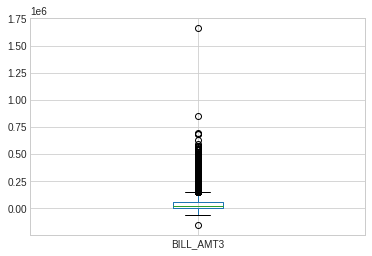

In [ ]:
cc_default.boxplot(column=['BILL_AMT3'])

In [ ]:
cc_default['BILL_AMT3'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    -157264.0
0.1          0.0
0.2       1187.8
0.3       5219.2
0.4      12197.2
0.5      20088.5
0.6      31401.0
0.7      49217.3
0.8      76777.4
0.9     132051.3
1.0    1664089.0
Name: BILL_AMT3, dtype: float64

In [ ]:
cc_default['BILL_AMT3'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91     139419.08
0.92     148633.24
0.93     160049.77
0.94     173241.34
0.95     187821.05
0.96     203652.80
0.97     228277.79
0.98     263208.54
0.99     325030.39
1.00    1664089.00
Name: BILL_AMT3, dtype: float64

Findings: In this varibale there are negative as well as positive outliers which are not wrong as negative balance indicates advance payment or cashbacks but still for the sake of proper analysis those outliers will be imputed by the median value of the variable in the data cleaning step.

## **Continous Variable 5=BILL_AMT4**

<AxesSubplot:>

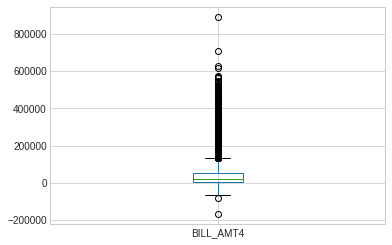

In [ ]:
cc_default.boxplot(column=['BILL_AMT4'])

In [ ]:
cc_default['BILL_AMT4'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0   -170000.0
0.1         0.0
0.2       988.0
0.3      4643.7
0.4     11145.0
0.5     19052.0
0.6     28604.4
0.7     45456.6
0.8     70579.0
0.9    122418.7
1.0    891586.0
Name: BILL_AMT4, dtype: float64

In [ ]:
cc_default['BILL_AMT4'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91    130937.09
0.92    138646.80
0.93    148287.35
0.94    160944.12
0.95    174333.35
0.96    190088.52
0.97    210965.51
0.98    246655.72
0.99    304997.27
1.00    891586.00
Name: BILL_AMT4, dtype: float64

Findings: In this varibale there are negative as well as positive outliers which are not wrong as negative balance indicates advance payment or cashbacks but still for the sake of proper analysis those outliers will be imputed by the median value of the variable in the data cleaning step.

## **Continuous Variable 6=BILL_AMT5**

<AxesSubplot:>

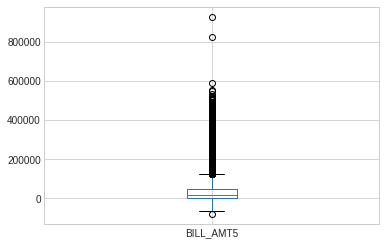

In [ ]:
cc_default.boxplot(column=['BILL_AMT5'])

In [ ]:
cc_default['BILL_AMT5'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    -81334.0
0.1         0.0
0.2       763.0
0.3      3637.0
0.4      9809.2
0.5     18104.5
0.6     26690.4
0.7     40943.2
0.8     65823.0
0.9    115883.0
1.0    927171.0
Name: BILL_AMT5, dtype: float64

In [ ]:
cc_default['BILL_AMT5'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91    123655.36
0.92    132233.96
0.93    141291.49
0.94    151270.38
0.95    165794.30
0.96    181044.44
0.97    198861.03
0.98    228587.04
0.99    285868.33
1.00    927171.00
Name: BILL_AMT5, dtype: float64

Findings: In this varibale there are negative as well as positive outliers which are not wrong as negative balance indicates advance payment or cashbacks but still for the sake of proper analysis those outliers will be imputed by the median value of the variable in the data cleaning step.

## **Continuous Variable 7=BILL_AMT6**

<AxesSubplot:>

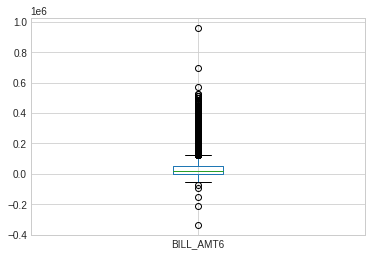

In [ ]:
cc_default.boxplot(column=['BILL_AMT6'])

In [ ]:
cc_default['BILL_AMT6'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0   -339603.0
0.1         0.0
0.2       476.0
0.3      2701.7
0.4      8770.2
0.5     17071.0
0.6     25508.4
0.7     39252.2
0.8     63150.6
0.9    112110.4
1.0    961664.0
Name: BILL_AMT6, dtype: float64

In [ ]:
cc_default['BILL_AMT6'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91    120740.53
0.92    129224.48
0.93    137836.47
0.94    148093.84
0.95    161912.00
0.96    177592.76
0.97    195114.30
0.98    223436.14
0.99    279505.06
1.00    961664.00
Name: BILL_AMT6, dtype: float64

Findings: In this varibale there are negative as well as positive outliers which are not wrong as negative balance indicates advance payment or cashbacks but still for the sake of proper analysis those outliers will be imputed by the median value of the variable in the data cleaning step.

## **Continuous Variable 8=PAY_AMT1**

<AxesSubplot:>

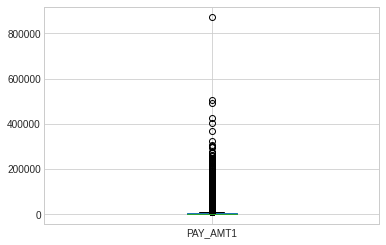

In [ ]:
cc_default.boxplot(column=['PAY_AMT1'])

In [ ]:
cc_default['PAY_AMT1'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0         0.0
0.1         0.0
0.2       316.0
0.3      1263.7
0.4      1724.0
0.5      2100.0
0.6      3000.0
0.7      4309.3
0.8      6192.2
0.9     10300.0
1.0    873552.0
Name: PAY_AMT1, dtype: float64

In [ ]:
cc_default['PAY_AMT1'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91     11174.00
0.92     12500.00
0.93     14127.07
0.94     15510.66
0.95     18428.20
0.96     21006.24
0.97     28232.78
0.98     40000.00
0.99     66522.18
1.00    873552.00
Name: PAY_AMT1, dtype: float64

FINDINGS:In the following variable there are some extreme outliers which might skew the analysis of the data hence to avoid this those outliers are imputed with the median value of the following variable.

## **Continuous Variable 9=PAY_AMT2**

<AxesSubplot:>

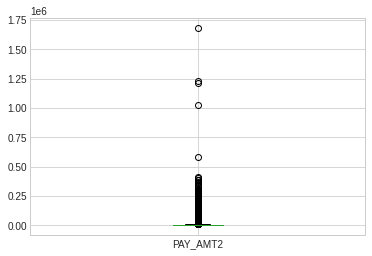

In [ ]:
cc_default.boxplot(column=['PAY_AMT2'])

In [ ]:
cc_default['PAY_AMT2'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0          0.0
0.1          0.0
0.2        268.8
0.3       1165.0
0.4       1600.0
0.5       2009.0
0.6       3000.0
0.7       4045.3
0.8       6000.0
0.9      10401.1
1.0    1684259.0
Name: PAY_AMT2, dtype: float64

In [ ]:
cc_default['PAY_AMT2'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91      11320.00
0.92      12536.16
0.93      14131.26
0.94      16000.00
0.95      19004.35
0.96      21408.36
0.97      29000.00
0.98      41027.88
0.99      76651.02
1.00    1684259.00
Name: PAY_AMT2, dtype: float64

## **Continuous Variable 10=PAY_AMT3**

<AxesSubplot:>

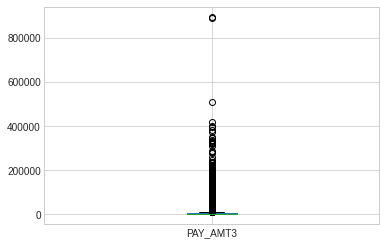

In [ ]:
cc_default.boxplot(column=['PAY_AMT3'])

In [ ]:
cc_default['PAY_AMT3'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0         0.0
0.1         0.0
0.2         2.8
0.3       780.0
0.4      1206.0
0.5      1800.0
0.6      2500.0
0.7      3560.3
0.8      5284.0
0.9     10000.0
1.0    896040.0
Name: PAY_AMT3, dtype: float64

In [ ]:
cc_default['PAY_AMT3'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91     10288.36
0.92     11558.48
0.93     13000.00
0.94     15000.00
0.95     17589.40
0.96     20150.00
0.97     27000.33
0.98     38661.36
0.99     70000.00
1.00    896040.00
Name: PAY_AMT3, dtype: float64

## **Continuous Variable 11=PAY_AMT4**

<AxesSubplot:>

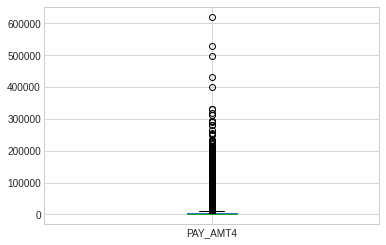

In [ ]:
cc_default.boxplot(column=['PAY_AMT4'])

In [ ]:
cc_default['PAY_AMT4'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0         0.0
0.1         0.0
0.2         0.0
0.3       500.0
0.4      1000.0
0.5      1500.0
0.6      2100.0
0.7      3200.0
0.8      5000.0
0.9      9570.6
1.0    621000.0
Name: PAY_AMT4, dtype: float64

In [ ]:
cc_default['PAY_AMT4'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91     10000.00
0.92     10404.72
0.93     11985.21
0.94     13949.60
0.95     16014.95
0.96     20000.00
0.97     26665.40
0.98     39634.04
0.99     67054.44
1.00    621000.00
Name: PAY_AMT4, dtype: float64

## **Continuous Variable 12=PAY_AMT5**

<AxesSubplot:>

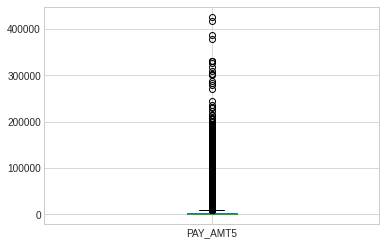

In [ ]:
cc_default.boxplot(column=['PAY_AMT5'])

In [ ]:
cc_default['PAY_AMT5'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0         0.0
0.1         0.0
0.2         0.0
0.3       500.0
0.4      1000.0
0.5      1500.0
0.6      2123.4
0.7      3200.0
0.8      5000.0
0.9      9500.0
1.0    426529.0
Name: PAY_AMT5, dtype: float64

In [ ]:
cc_default['PAY_AMT5'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91     10000.00
0.92     10358.16
0.93     11964.14
0.94     13939.06
0.95     16000.00
0.96     20000.00
0.97     25314.21
0.98     37259.66
0.99     65607.56
1.00    426529.00
Name: PAY_AMT5, dtype: float64

## **Continuous Variable 13=PAY_AMT6**

<AxesSubplot:>

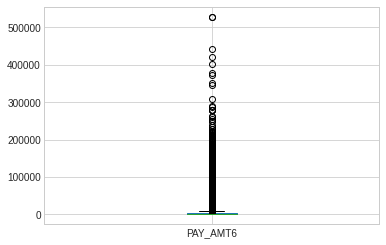

In [ ]:
cc_default.boxplot(column=['PAY_AMT6'])

In [ ]:
cc_default['PAY_AMT6'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0         0.0
0.1         0.0
0.2         0.0
0.3       426.0
0.4      1000.0
0.5      1500.0
0.6      2100.0
0.7      3200.0
0.8      5000.0
0.9      9600.0
1.0    528666.0
Name: PAY_AMT6, dtype: float64

In [ ]:
cc_default['PAY_AMT6'].quantile([0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.91     10000.00
0.92     10500.00
0.93     12017.14
0.94     14442.86
0.95     17343.80
0.96     21034.88
0.97     29561.76
0.98     45010.48
0.99     82619.05
1.00    528666.00
Name: PAY_AMT6, dtype: float64

# **Data Cleaning and Data Preparation**

## **CATEGORICAL/DISCRETE VARIABLES**

### Var1 Cleaning=EDUCATION

In [ ]:
cc_default['EDUCATION']=cc_default['EDUCATION'].replace([0],2)

In [ ]:
cc_default['EDUCATION'].value_counts()

2    14044
1    10585
3     4917
5      280
4      123
6       51
Name: EDUCATION, dtype: int64

### Var2 Cleaning=MARRIAGE


In [ ]:
cc_default['MARRIAGE']=cc_default['MARRIAGE'].replace([0],2)

In [ ]:
cc_default['MARRIAGE'].value_counts()

2    16018
1    13659
3      323
Name: MARRIAGE, dtype: int64

### **VAR 3 Cleaning=PAY_0**

In [ ]:
cc_default.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [ ]:
cc_default['PAY_1']=cc_default['PAY_1'].replace([-1,-2],0)
cc_default['PAY_1']=cc_default['PAY_1'].replace([1,2,3],1)
cc_default['PAY_1']=cc_default['PAY_1'].replace([4,5,6],2)
cc_default['PAY_1']=cc_default['PAY_1'].replace([7,8,9],3)

<AxesSubplot:xlabel='PAY_1', ylabel='count'>

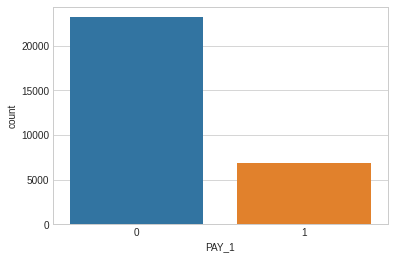

In [ ]:
sns.countplot(x='PAY_1',data=cc_default)

### **VAR4 Cleaning=PAY_2**

In [ ]:
cc_default['PAY_2']=cc_default['PAY_2'].replace([-1,-2],0)
cc_default['PAY_2']=cc_default['PAY_2'].replace([1,2,3],1)
cc_default['PAY_2']=cc_default['PAY_2'].replace([4,5,6],2)
cc_default['PAY_2']=cc_default['PAY_2'].replace([7,8,9],3)


In [ ]:
cc_default['PAY_2'].value_counts()

0    25562
1     4281
2      136
3       21
Name: PAY_2, dtype: int64

### **VAR5 Cleaning=PAY_3**

In [ ]:
cc_default['PAY_3']=cc_default['PAY_3'].replace([-1,-2],0)
cc_default['PAY_3']=cc_default['PAY_3'].replace([1,2,3],1)
cc_default['PAY_3']=cc_default['PAY_3'].replace([4,5,6],2)
cc_default['PAY_3']=cc_default['PAY_3'].replace([7,8,9],3)

In [ ]:
cc_default['PAY_3'].value_counts()

0    25787
1     4063
2      120
3       30
Name: PAY_3, dtype: int64

### **VAR6 Cleaning=PAY_4**

In [ ]:
cc_default['PAY_4']=cc_default['PAY_4'].replace([-1,-2],0)
cc_default['PAY_4']=cc_default['PAY_4'].replace([1,2,3],1)
cc_default['PAY_4']=cc_default['PAY_4'].replace([4,5,6],2)
cc_default['PAY_4']=cc_default['PAY_4'].replace([7,8,9],3)

In [ ]:
cc_default['PAY_4'].value_counts()

0    26490
1     3341
2      109
3       60
Name: PAY_4, dtype: int64

### **VAR7 Cleaning=PAY_5**

In [ ]:
cc_default['PAY_5']=cc_default['PAY_5'].replace([-1,-2],0)
cc_default['PAY_5']=cc_default['PAY_5'].replace([1,2,3],1)
cc_default['PAY_5']=cc_default['PAY_5'].replace([4,5,6],2)
cc_default['PAY_5']=cc_default['PAY_5'].replace([7,8,9],3)

In [ ]:
cc_default['PAY_5'].value_counts()

0    27032
1     2804
2      105
3       59
Name: PAY_5, dtype: int64

### **VAR8 Cleaning=PAY_6**

In [ ]:
cc_default['PAY_6']=cc_default['PAY_6'].replace([-1,-2],0)
cc_default['PAY_6']=cc_default['PAY_6'].replace([1,2,3],1)
cc_default['PAY_6']=cc_default['PAY_6'].replace([4,5,6],2)
cc_default['PAY_6']=cc_default['PAY_6'].replace([7,8,9],3)

In [ ]:
cc_default['PAY_6'].value_counts()

0    26921
1     2950
2       81
3       48
Name: PAY_6, dtype: int64

## **COUNTINUOUS VARIABLE CLEANING**

### **VAR1 Cleaning=LIMIT_BAL**

In [ ]:
cc_default['LIMIT_BAL'].median()

140000.0

In [ ]:
cc_default.loc[cc_default['LIMIT_BAL']>500000,'LIMIT_BAL']=cc_default['LIMIT_BAL'].median()

<AxesSubplot:>

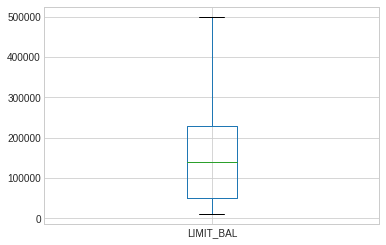

In [ ]:
cc_default.boxplot(column=['LIMIT_BAL'])

### **VAR2 Cleaning=BILL_AMT1**

In [ ]:
cc_default['BILL_AMT1'].median()

22381.5

In [ ]:
cc_default.loc[cc_default['BILL_AMT1']>400000,'BILL_AMT1']=cc_default['BILL_AMT1'].median()
cc_default.loc[cc_default['BILL_AMT1']<0,'BILL_AMT1']=cc_default['BILL_AMT1'].median()

<AxesSubplot:>

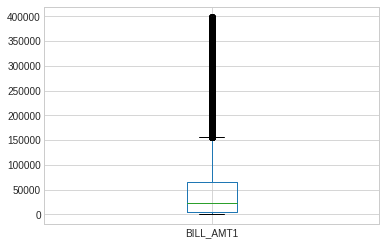

In [ ]:
cc_default.boxplot(column=['BILL_AMT1'])

### **VAR3 Cleaning3=BILL_AMT2**

In [ ]:
cc_default['BILL_AMT2'].median()

21200.0

In [ ]:
cc_default.loc[cc_default['BILL_AMT2']>400000,'BILL_AMT2']=cc_default['BILL_AMT2'].median()
cc_default.loc[cc_default['BILL_AMT2']<0,'BILL_AMT2']=cc_default['BILL_AMT2'].median()

<AxesSubplot:>

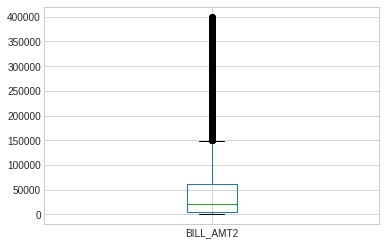

In [ ]:
cc_default.boxplot(column=['BILL_AMT2'])

### **VAR4 Cleaning=BILL_AMT3**

In [ ]:
cc_default['BILL_AMT3'].median()

20088.5

In [ ]:
cc_default.loc[cc_default['BILL_AMT3']>400000,'BILL_AMT3']=cc_default['BILL_AMT3'].median()
cc_default.loc[cc_default['BILL_AMT3']<0,'BILL_AMT3']=cc_default['BILL_AMT3'].median()

<AxesSubplot:>

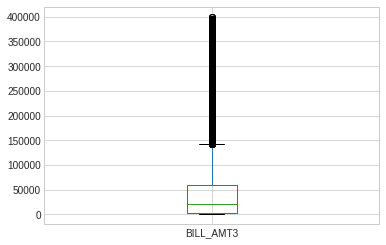

In [ ]:
cc_default.boxplot(column=['BILL_AMT3'])

### **VAR5 Cleaning=BILL_AMT4**

In [ ]:
cc_default['BILL_AMT4'].median()

19052.0

In [ ]:
cc_default.loc[cc_default['BILL_AMT4']>400000,'BILL_AMT4']=cc_default['BILL_AMT4'].median()
cc_default.loc[cc_default['BILL_AMT4']<0,'BILL_AMT4']=cc_default['BILL_AMT4'].median()

<AxesSubplot:>

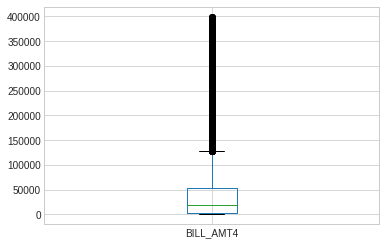

In [ ]:
cc_default.boxplot(column=['BILL_AMT4'])

### **VAR6 Cleaning=BILL_AMT5**

In [ ]:
cc_default['BILL_AMT5'].median()

18104.5

In [ ]:
cc_default.loc[cc_default['BILL_AMT5']>400000,'BILL_AMT5']=cc_default['BILL_AMT5'].median()
cc_default.loc[cc_default['BILL_AMT5']<0,'BILL_AMT5']=cc_default['BILL_AMT5'].median()

<AxesSubplot:>

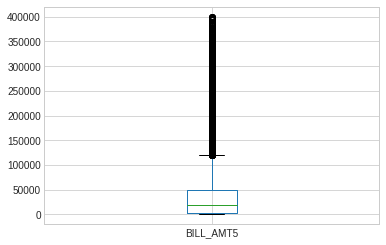

In [ ]:
cc_default.boxplot(column=['BILL_AMT5'])

### **VAR7 Cleaning=BILL_AMT6**

In [ ]:
cc_default['BILL_AMT6'].median()

17071.0

In [ ]:
cc_default.loc[cc_default['BILL_AMT6']>400000,'BILL_AMT6']=cc_default['BILL_AMT6'].median()
cc_default.loc[cc_default['BILL_AMT6']<0,'BILL_AMT6']=cc_default['BILL_AMT6'].median()

<AxesSubplot:>

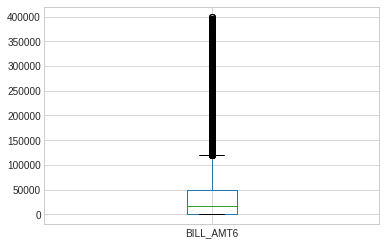

In [ ]:
cc_default.boxplot(column=['BILL_AMT6'])

### **VAR8 Cleaning=PAY_AMT1**

In [ ]:
cc_default['PAY_AMT1'].median()

2100.0

In [ ]:
cc_default.loc[cc_default['PAY_AMT1']>80000,'PAY_AMT1']=cc_default['PAY_AMT1'].median()

<AxesSubplot:>

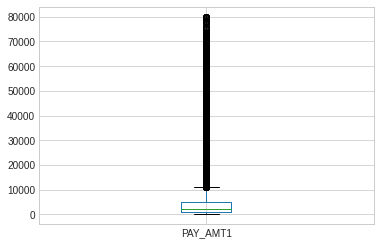

In [ ]:
cc_default.boxplot(column=['PAY_AMT1'])

### **VAR9 Cleaning=PAY_AMT2**

In [ ]:
cc_default['PAY_AMT2'].median()

2009.0

In [ ]:
cc_default.loc[cc_default['PAY_AMT2']>80000,'PAY_AMT2']=cc_default['PAY_AMT2'].median()

<AxesSubplot:>

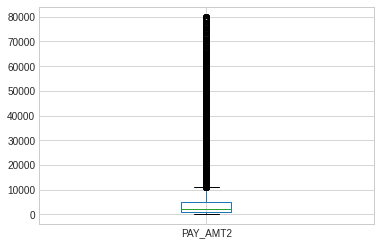

In [ ]:
cc_default.boxplot(column=['PAY_AMT2'])

### **VAR10 Cleaning=PAY_AMT3**

In [ ]:
cc_default['PAY_AMT3'].median()

1800.0

In [ ]:
cc_default.loc[cc_default['PAY_AMT3']>80000,'PAY_AMT3']=cc_default['PAY_AMT3'].median()

<AxesSubplot:>

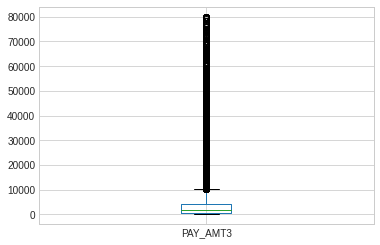

In [ ]:
cc_default.boxplot(column=['PAY_AMT3'])

### **VAR11 Cleaning=PAY_AMT4**

In [ ]:
cc_default['PAY_AMT4'].median()

1500.0

In [ ]:
cc_default.loc[cc_default['PAY_AMT4']>80000,'PAY_AMT4']=cc_default['PAY_AMT4'].median()

<AxesSubplot:>

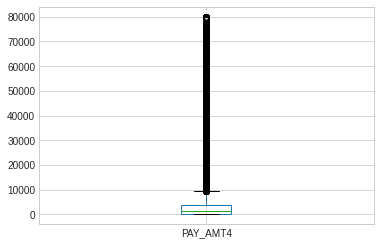

In [ ]:
cc_default.boxplot(column=['PAY_AMT4'])

### **VAR12 Cleaning=PAY_AMT5**

In [ ]:
cc_default['PAY_AMT5'].median()

1500.0

In [ ]:
cc_default.loc[cc_default['PAY_AMT5']>80000,'PAY_AMT5']=cc_default['PAY_AMT5'].median()

<AxesSubplot:>

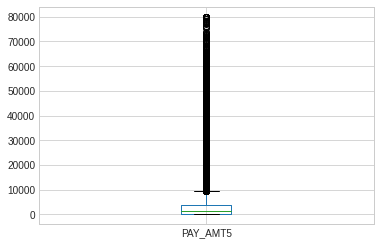

In [ ]:
cc_default.boxplot(column=['PAY_AMT5'])

### **VAR13 Cleaning=PAY_AMT6**

In [ ]:
cc_default['PAY_AMT6'].median()

1500.0

In [ ]:
cc_default.loc[cc_default['PAY_AMT6']>80000,'PAY_AMT6']=cc_default['PAY_AMT6'].median()

<AxesSubplot:>

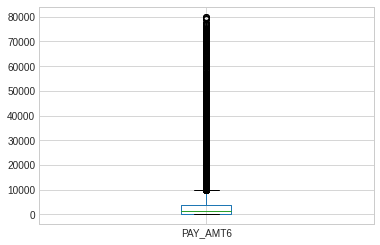

In [ ]:
cc_default.boxplot(column=['PAY_AMT6'])

# Model Building
Select the right model, Include Feature Engineering, Perform Model Validation, Multiple models and performance comparison


**Findings after exploration and cleaning =In this Dataframe the Target_variable=default.payment.next.month which is a categorical variable taking binary values hence the problem to be addressed is a Classification Problem, therefore we will go for Logistic Regression Analysis.**

In [ ]:
import sklearn as sk
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
cc_default.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,1,1,0,0,...,0.0,0.00,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,1,0,0,...,3272.0,3455.00,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.00,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.00,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.00,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.00,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,19052.0,18104.50,17071.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,0,0,0,...,221.0,18104.25,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,1,0,...,12211.0,11793.00,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,0,0,0,0,...,0.0,13007.00,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [ ]:
cc_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
logistic=LogisticRegression()
logistic.fit(cc_default[['LIMIT_BAL']+['SEX']+['EDUCATION']+['MARRIAGE']+['AGE']+['PAY_1']+['PAY_2']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['BILL_AMT1']+['BILL_AMT2']+['BILL_AMT3']+['BILL_AMT4']+['BILL_AMT5']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']],cc_default[['default.payment.next.month']])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

Intercept [-5.50072399e-06]
Coefficients [[-4.61665681e-06 -9.67272709e-06 -1.21047720e-05 -1.04010601e-05
  -1.65478106e-04  6.69936120e-06  5.07676823e-06  4.18374881e-06
   3.93413029e-06  3.62739737e-06  3.23934276e-06 -5.33768270e-06
   7.80297091e-07  1.35677507e-06  2.74816804e-06  1.00403183e-06
   4.58301187e-06 -4.07852612e-05 -5.06773966e-05 -3.20084470e-05
  -1.63815856e-05 -2.10305180e-05 -1.74004682e-05]]


# Model Validation
Confusion matrix, Sensitivity, Specificity, F1 Score, Recall, Precision etc.

In [ ]:
prediction=logistic.predict(cc_default[['LIMIT_BAL']+['SEX']+['EDUCATION']+['MARRIAGE']+['AGE']+['PAY_1']+['PAY_2']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['BILL_AMT1']+['BILL_AMT2']+['BILL_AMT3']+['BILL_AMT4']+['BILL_AMT5']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']])
prediction

CM=confusion_matrix(cc_default[['default.payment.next.month']],prediction)
print(CM)

[[23348    16]
 [ 6623    13]]


In [ ]:
print("col sums", sum(CM))
total=sum(sum(CM))
print("Total", total)


col sums [29971    29]
Total 30000


In [ ]:
Accuracy=(CM[0,0]+CM[1,1])/total
Accuracy

0.7787

### **NOTE: Although the accuracy is about 80% but it does not gurantee the success of the model and for that we have to assess the impactfulness of variables and hence from here we will go on to calculate the VIF.**

In [ ]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
vif_cal(input_data=cc_default,dependent_col="default.payment.next.month")

ID  VIF =  1.02
LIMIT_BAL  VIF =  1.37
SEX  VIF =  1.02
EDUCATION  VIF =  1.12
MARRIAGE  VIF =  1.23
AGE  VIF =  1.27
PAY_1  VIF =  1.78
PAY_2  VIF =  2.51
PAY_3  VIF =  2.37
PAY_4  VIF =  2.73
PAY_5  VIF =  2.96
PAY_6  VIF =  2.14
BILL_AMT1  VIF =  7.84
BILL_AMT2  VIF =  12.51
BILL_AMT3  VIF =  10.87
BILL_AMT4  VIF =  11.53
BILL_AMT5  VIF =  13.89
BILL_AMT6  VIF =  9.01
PAY_AMT1  VIF =  1.34
PAY_AMT2  VIF =  1.35
PAY_AMT3  VIF =  1.31
PAY_AMT4  VIF =  1.33
PAY_AMT5  VIF =  1.34
PAY_AMT6  VIF =  1.22


Now if the value of VIF of variable<=5 then it will be considered as impactful and we will keep the variable otherwise we will drop variables in a sequential manner.

In [ ]:
#dropping column=BILL_AMT5
vif_cal(input_data=cc_default.drop("BILL_AMT5", axis=1), dependent_col="default.payment.next.month")

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.37
SEX  VIF =  1.02
EDUCATION  VIF =  1.12
MARRIAGE  VIF =  1.23
AGE  VIF =  1.27
PAY_1  VIF =  1.78
PAY_2  VIF =  2.51
PAY_3  VIF =  2.37
PAY_4  VIF =  2.73
PAY_5  VIF =  2.96
PAY_6  VIF =  2.14
BILL_AMT1  VIF =  7.84
BILL_AMT2  VIF =  12.5
BILL_AMT3  VIF =  10.85
BILL_AMT4  VIF =  9.13
BILL_AMT6  VIF =  4.8
PAY_AMT1  VIF =  1.34
PAY_AMT2  VIF =  1.35
PAY_AMT3  VIF =  1.31
PAY_AMT4  VIF =  1.26
PAY_AMT5  VIF =  1.3
PAY_AMT6  VIF =  1.22


In [ ]:
#dropping column=BILL_AMT2
vif_cal(input_data=cc_default.drop(["BILL_AMT5","BILL_AMT2"], axis=1), dependent_col="default.payment.next.month")

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.37
SEX  VIF =  1.02
EDUCATION  VIF =  1.12
MARRIAGE  VIF =  1.23
AGE  VIF =  1.27
PAY_1  VIF =  1.78
PAY_2  VIF =  2.51
PAY_3  VIF =  2.37
PAY_4  VIF =  2.73
PAY_5  VIF =  2.96
PAY_6  VIF =  2.14
BILL_AMT1  VIF =  4.29
BILL_AMT3  VIF =  8.73
BILL_AMT4  VIF =  9.13
BILL_AMT6  VIF =  4.77
PAY_AMT1  VIF =  1.3
PAY_AMT2  VIF =  1.34
PAY_AMT3  VIF =  1.31
PAY_AMT4  VIF =  1.26
PAY_AMT5  VIF =  1.3
PAY_AMT6  VIF =  1.22


In [ ]:
#dropping column=BILL_AMT4
vif_cal(input_data=cc_default.drop(["BILL_AMT5","BILL_AMT2","BILL_AMT4"], axis=1), dependent_col="default.payment.next.month")

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.37
SEX  VIF =  1.02
EDUCATION  VIF =  1.12
MARRIAGE  VIF =  1.23
AGE  VIF =  1.27
PAY_1  VIF =  1.78
PAY_2  VIF =  2.51
PAY_3  VIF =  2.37
PAY_4  VIF =  2.73
PAY_5  VIF =  2.96
PAY_6  VIF =  2.14
BILL_AMT1  VIF =  4.29
BILL_AMT3  VIF =  5.84
BILL_AMT6  VIF =  3.4
PAY_AMT1  VIF =  1.3
PAY_AMT2  VIF =  1.34
PAY_AMT3  VIF =  1.26
PAY_AMT4  VIF =  1.26
PAY_AMT5  VIF =  1.29
PAY_AMT6  VIF =  1.22


In [ ]:
#dropping column=BILL_AMT3
vif_cal(input_data=cc_default.drop(["BILL_AMT5","BILL_AMT2","BILL_AMT4","BILL_AMT3"], axis=1), dependent_col="default.payment.next.month")

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.37
SEX  VIF =  1.02
EDUCATION  VIF =  1.12
MARRIAGE  VIF =  1.23
AGE  VIF =  1.27
PAY_1  VIF =  1.78
PAY_2  VIF =  2.51
PAY_3  VIF =  2.37
PAY_4  VIF =  2.73
PAY_5  VIF =  2.96
PAY_6  VIF =  2.14
BILL_AMT1  VIF =  2.38
BILL_AMT6  VIF =  2.56
PAY_AMT1  VIF =  1.29
PAY_AMT2  VIF =  1.3
PAY_AMT3  VIF =  1.26
PAY_AMT4  VIF =  1.26
PAY_AMT5  VIF =  1.29
PAY_AMT6  VIF =  1.22


**After calculating VIF and dropping the less impactful Variables in a sequential manner we will go for checking the P-Value of the remaining variables to filter the remaining impactful variables.**

In [ ]:
import statsmodels.api as sm
A1=sm.Logit(cc_default['default.payment.next.month'],cc_default[["ID"]+['LIMIT_BAL']+['SEX']+['EDUCATION']+['MARRIAGE']+['AGE']+['PAY_1']+['PAY_2']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['BILL_AMT1']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']])
A1.fit()
print(A1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.448804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.448804
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29980
Method:                                   MLE   Df Model:                           19
Date:                        Sun, 26 Feb 2023   Pseudo R-squ.:                  0.1507
Time:                                17:38:52   Log-Likelihood:                -13464.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

FINDING: Column BILL_AMT61 is having P-Value>0.05 hence it is not an impactful variable and thus we will drop it.

In [ ]:
A1=sm.Logit(cc_default['default.payment.next.month'],cc_default[["ID"]+['LIMIT_BAL']+['SEX']+['EDUCATION']+['MARRIAGE']+['AGE']+['PAY_1']+['PAY_2']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']])
A1.fit()
print(A1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.448805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.448805
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29981
Method:                                   MLE   Df Model:                           18
Date:                        Sun, 26 Feb 2023   Pseudo R-squ.:                  0.1507
Time:                                17:40:52   Log-Likelihood:                -13464.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

**Now we have all the impactful variables nad now we will rank these variables in the order of their impactfulness by considering the WALD CHISQUARE VALUE. Higher the Wald Chisquare Value the more impactful is the variable.**

In [ ]:
A1=sm.Logit(cc_default['default.payment.next.month'],cc_default[["ID"]+['LIMIT_BAL']+['SEX']+['EDUCATION']+['MARRIAGE']+['AGE']+['PAY_1']+['PAY_2']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']])
A1.fit()
print(A1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.448805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.448805
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29981
Method:                                   MLE   Df Model:                           18
Date:                        Sun, 26 Feb 2023   Pseudo R-squ.:                  0.1507
Time:                                17:44:10   Log-Likelihood:                -13464.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [ ]:
#1.PAY_1
#2.MARRIAGE
#3.LIMIT_BAL
#4.SEX
#5.PAY_AMT2
#6.BILL_AMT6
#7.EDUCATION
#8.PAY_6
#9.PAY_3
#10.PAY_4
#11.PAY_AMT1
#12.AGE
#13.PAY_AMT3
#14.PAY_AMT4
#15.PAY_AMT5
#16.PAY_5
#17.PAY_AMT6
#18.PAY_2
#19.ID

## **MODEL ACCURACY after dropping variables that are less impactful**

In [ ]:
cc_default.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5'],axis=1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,1,1,0,0,0,0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,1,0,0,0,1,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,0,0,0,0,0,0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,1,1,1,0,0,0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,0,0,0,0,0,48944.0,2100.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
logistic1=LogisticRegression()
logistic1.fit(cc_default[['LIMIT_BAL']+['SEX']+['EDUCATION']+['MARRIAGE']+['AGE']+['PAY_1']+['PAY_2']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']],cc_default[['default.payment.next.month']])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("Intercept", logistic1.intercept_)
print("Coefficients", logistic1.coef_)

Intercept [-0.00045038]
Coefficients [[-3.06178834e-06 -7.85812610e-04 -9.98187371e-04 -8.45145498e-04
  -1.36721551e-02  5.22147308e-04  3.93934090e-04  3.30295828e-04
   3.11500759e-04  2.86684542e-04  2.56237380e-04  5.35499851e-06
  -3.22583404e-05 -4.13043154e-05 -1.99190850e-05 -1.50934620e-05
  -1.93174810e-05 -1.27952898e-05]]


In [ ]:
predict1=logistic1.predict(cc_default[['LIMIT_BAL']+['SEX']+['EDUCATION']+['MARRIAGE']+['AGE']+['PAY_1']+['PAY_2']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']])
predict1

CM1=confusion_matrix(cc_default[['default.payment.next.month']],predict1)
print(CM1)

[[23362     2]
 [ 6634     2]]


In [ ]:
print("col sums", sum(CM1))
total1=sum(sum(CM1))
print("Total", total1)

col sums [29996     4]
Total 30000


In [ ]:
Accuracy1=(CM1[0,0]+CM1[1,1])/total1
Accuracy1

0.7788

# Model  Deployment
## Optional step